<a href="https://colab.research.google.com/github/rodrygofesantos/oficina_forped/blob/main/Mapa_de_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mapa de calor**

Construir um mapa de calor (heatmap) com os 10 municípios de Minas Gerais que registraram o maior número de casos confirmados, agrupando por mês no ano de 2021.

Fonte original dos dados: https://coronavirus.saude.mg.gov.br/dadosabertos

Essas bibliotecas são fundamentais para:

* **Pandas**: ler e manipular dados.
* **Matplotlib.pyplot**: criar o plano gráfico.
* **seaborn**: gerar o mapa de calor com estilo e cores.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Leitura da base de dados**

O arquivo .csv está separado por ; e com acentuação ISO (latin1).
É carregado diretamente do ambiente do Google Colab.

In [16]:
df = pd.read_csv("/content/XLSX_Painel_2021.csv", sep=";", encoding="latin1")

**Padronização de colunas**

In [22]:
# Renomear a coluna do município para facilitar o uso
df = df.rename(columns={'ï»¿MUNICIPIO_RESIDENCIA': 'MUNICIPIO'})

# Converter a coluna de data para o tipo datetime
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# Criar uma nova coluna com o nome do mês e ano
df['MES_ANO'] = df['DATA'].dt.to_period('M').astype(str)

# Remover linhas com datas inválidas (NaT)
df = df.dropna(subset=['DATA'])

**Agrupamento por município e mês**

Agrupa os dados por município e mês.
Usa a função sum para somar os casos confirmados em cada mês para cada cidade.

In [23]:
# Agrupar por município e mês e somar os casos confirmados
df_grouped = df.groupby(['MUNICIPIO', 'MES_ANO'])['CONFIRMADOS'].sum().reset_index()

**Seleção dos 10 municípios com mais casos no total**

Soma os casos por município e seleciona os 10 maiores (nlargest(10)).
Filtra a base para manter apenas esses municípios.



In [28]:
# Selecionar os 10 municípios com maior total de casos confirmados
top_municipios = df_grouped.groupby('MUNICIPIO')['CONFIRMADOS'].sum().nlargest(10).index
# Filtrar os dados para apenas os 10 municípios com mais casos
df_top = df_grouped[df_grouped['MUNICIPIO'].isin(top_municipios)]

**Transformação para tabela dinâmica (formato de matriz)**

Transforma os dados em formato de matriz:

* Linhas = meses.

* Colunas = municípios.

* Células = total de casos confirmados.

Preenche valores ausentes com 0 e converte para int.

In [29]:
# Criar tabela no formato necessário para o heatmap
df_pivot = df_top.pivot(index='MES_ANO', columns='MUNICIPIO', values='CONFIRMADOS').fillna(0)

**Criação do mapa de calor**

1. Define o tamanho da figura.

2. Configura a fonte (font_scale=1.1).

3. Usa o heatmap para desenhar a matriz com:

* Cores da paleta YlOrRd (amarelo-laranja-vermelho).

* Números com separador de milhar usando fmt=','.

* Linhas de grade sutis entre células.

4. Define título e rótulos dos eixos.

5. plt.tight_layout() evita que as legendas se sobreponham.

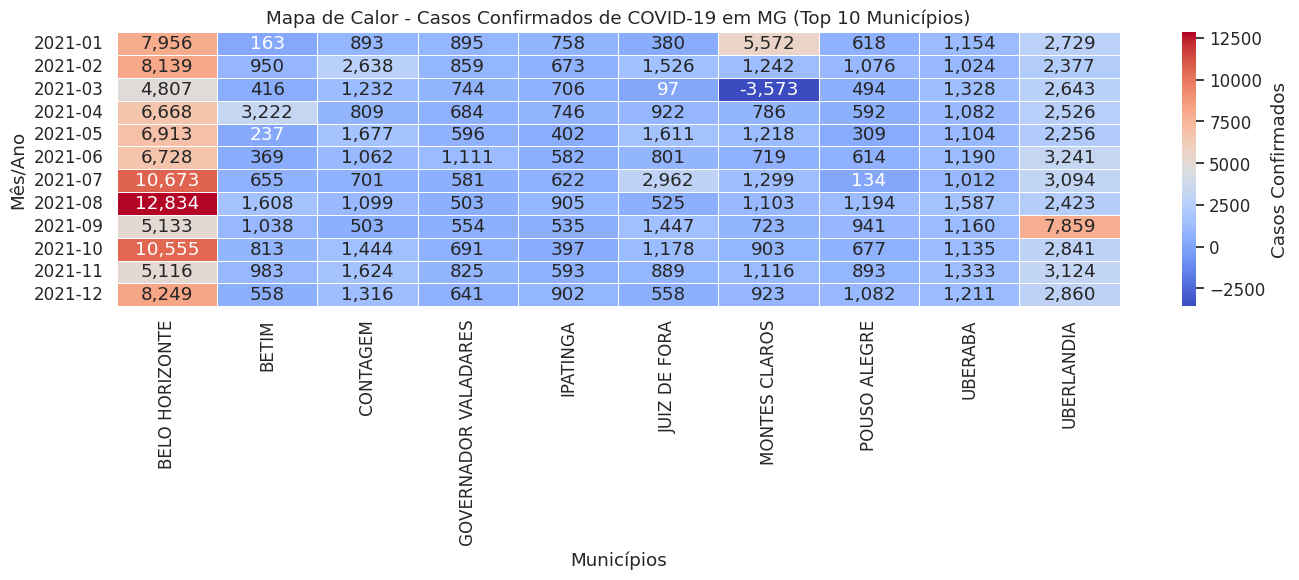

In [30]:
# Plotar o mapa de calor
plt.figure(figsize=(14, 6))
sns.set(font_scale=1.1)
ax = sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=",.0f", linewidths=.5, cbar_kws={'label': 'Casos Confirmados'})
plt.title("Mapa de Calor - Casos Confirmados de COVID-19 em MG (Top 10 Municípios)")
plt.xlabel("Municípios")
plt.ylabel("Mês/Ano")
plt.tight_layout()
plt.show()

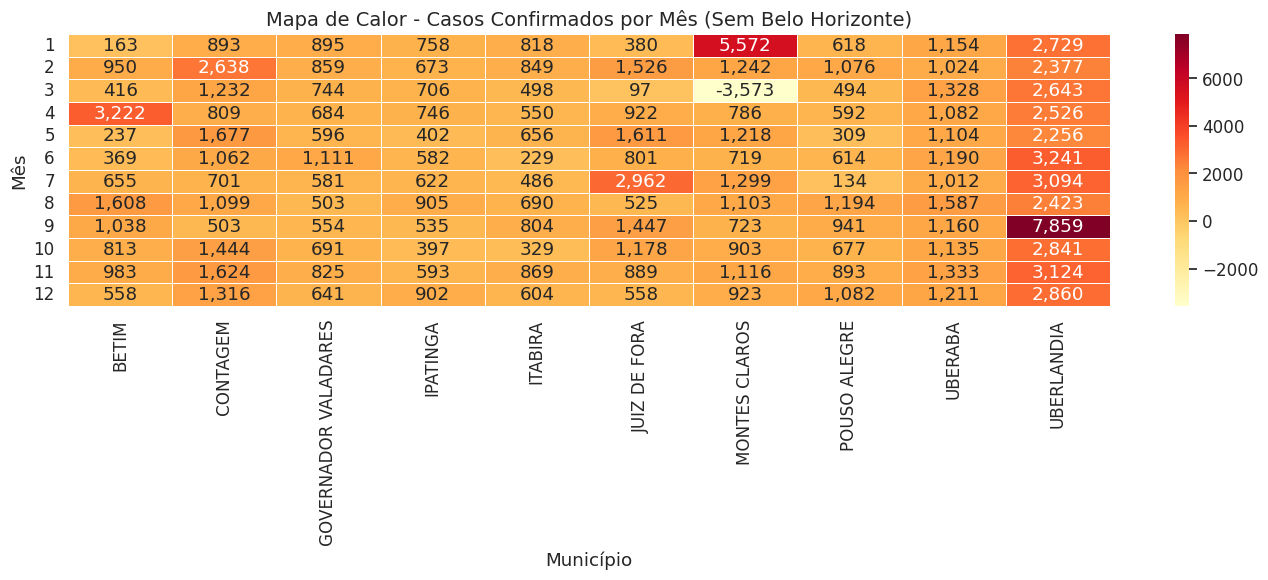

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recarregar os dados para garantir estado limpo
file_path = "/content/XLSX_Painel_2021.csv"
df = pd.read_csv(file_path, encoding='latin1', sep=';', low_memory=False)

# Corrigir possíveis caracteres estranhos no nome das colunas
df.columns = [col.replace('ï»¿', '') for col in df.columns]

# Converter a coluna de data
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# Remover linhas com datas inválidas (NaT)
df = df.dropna(subset=['DATA'])

# Criar colunas de ano e mês
df['Ano'] = df['DATA'].dt.year
df['Mês'] = df['DATA'].dt.month

# Agrupar por município e mês, somando os casos confirmados
casos_mensais = df.groupby(['MUNICIPIO_RESIDENCIA', 'Mês'])['CONFIRMADOS'].sum().reset_index()

# Identificar os 10 municípios com mais casos, excluindo Belo Horizonte
municipios_totais = casos_mensais.groupby('MUNICIPIO_RESIDENCIA')['CONFIRMADOS'].sum()
municipios_top10_sem_bh = municipios_totais.drop('BELO HORIZONTE', errors='ignore').nlargest(10).index

# Filtrar os dados para esses 10 municípios
casos_top10_sem_bh = casos_mensais[casos_mensais['MUNICIPIO_RESIDENCIA'].isin(municipios_top10_sem_bh)]

# Criar tabela pivô
tabela_pivot_sem_bh = casos_top10_sem_bh.pivot(index='Mês', columns='MUNICIPIO_RESIDENCIA', values='CONFIRMADOS').fillna(0)

# Plotar heatmap com separador de milhar
plt.figure(figsize=(14, 6))
sns.set(font_scale=1.1)

ax = sns.heatmap(tabela_pivot_sem_bh, annot=True, fmt=",.0f", cmap='YlOrRd', linewidths=0.5)

plt.title("Mapa de Calor - Casos Confirmados por Mês (Sem Belo Horizonte)", fontsize=14)
plt.xlabel("Município")
plt.ylabel("Mês")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()
